In [1]:
import sys
sys.path.append("/home/jarlehti/projects/gradu")

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import linalg

In [3]:
CURRENT_FOLDER = os.path.dirname(os.path.dirname(os.path.abspath(__name__)))
RESULTS_FOLDER = os.path.join(CURRENT_FOLDER, "results")
PLOTS_FOLDER = os.path.join(CURRENT_FOLDER, "plots")

In [4]:
linear_regression_results = pd.read_csv(os.path.join(RESULTS_FOLDER, "napsu_linear_regression_test_timer.csv"))

In [5]:
# Because header is repeated multiple times, remove the duplicate headers
linear_regression_results = linear_regression_results[linear_regression_results['start'] != 'start']

In [6]:
data_type_dict = {
    'experiment_id': str,
    'start': float,
    'stop': float,
    'timedelta': float,
    'task': str,
    'dataset_name': str,
    'query': object,
    'epsilon': float,
    'delta': float,
    'MCMC_algo': str,
    'laplace_approximation': bool,
    'laplace_approximation_algorithm': str, 
    'query_str': str,
    'query_list': object,
    'missing_query': str,
    'discretization': bool,
    'n_canonical_queries': float,
    'junction_tree_width': float,
    'suff_stat_dim': object,
}

linear_regression_results = linear_regression_results.astype(data_type_dict)

In [7]:
linear_regression_results

,experiment_id,start,stop,timedelta,task,dataset_name,query,epsilon,delta,MCMC_algo,...,query_str,query_list,missing_query,discretization,no_privacy,n_canonical_queries,junction_tree_width,suff_stat_dim,suff_stat,dp_suff_stat
0,6VXEVE4E,2.283924e+06,2.283953e+06,29.715815,Main run,dummy_5x2,[],3.0,1.000000e-08,NUTS,...,nan,NaN,nan,True,NaN,NaN,NaN,NaN,NaN,NaN
1,6VXEVE4E,2.283924e+06,2.283929e+06,4.949003,Query selection,dummy_5x2,NaN,3.0,1.000000e-08,NUTS,...,empty,[],nan,True,False,NaN,NaN,NaN,NaN,NaN
2,6VXEVE4E,2.283929e+06,2.283929e+06,0.000110,Calculating full marginal query,dummy_5x2,NaN,3.0,1.000000e-08,NUTS,...,empty,[],nan,True,False,NaN,NaN,NaN,NaN,NaN
3,6VXEVE4E,2.283929e+06,2.283929e+06,0.008496,Calculating canonical query set,dummy_5x2,NaN,3.0,1.000000e-08,NUTS,...,empty,[],nan,True,False,NaN,NaN,NaN,NaN,NaN
4,6VXEVE4E,2.283929e+06,2.283930e+06,0.652658,Laplace approximation,dummy_5x2,NaN,3.0,1.000000e-08,NUTS,...,empty,[],nan,True,False,9.0,2.0,"(9,)",[2385 2556 2606 2510 2409 2503 2588 2476 2468],[2390.84690271 2553.47395266 2614.65103684 251...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4194,506HVC3T,2.324004e+06,2.324009e+06,5.102555,Query selection,dummy_5x7,NaN,0.1,1.000000e-08,NUTS,...,empty,[],nan,True,False,NaN,NaN,NaN,NaN,NaN
4195,506HVC3T,2.324009e+06,2.324009e+06,0.000454,Calculating full marginal query,dummy_5x7,NaN,0.1,1.000000e-08,NUTS,...,empty,[],nan,True,False,NaN,NaN,NaN,NaN,NaN
4196,506HVC3T,2.324009e+06,2.324010e+06,0.015298,Calculating canonical query set,dummy_5x7,NaN,0.1,1.000000e-08,NUTS,...,empty,[],nan,True,False,NaN,NaN,NaN,NaN,NaN
4197,506HVC3T,2.324010e+06,2.324054e+06,43.871450,Laplace approximation,dummy_5x7,NaN,0.1,1.000000e-08,NUTS,...,empty,[],nan,True,False,174.0,3.0,"(174,)",[279 279 257 251 316 137 285 278 291 282 273 1...,[ 4.20210844e+02 2.83385742e+02 2.72596654e+...


In [8]:
MCMC_rows = linear_regression_results[linear_regression_results['task'] == 'MCMC']

[]

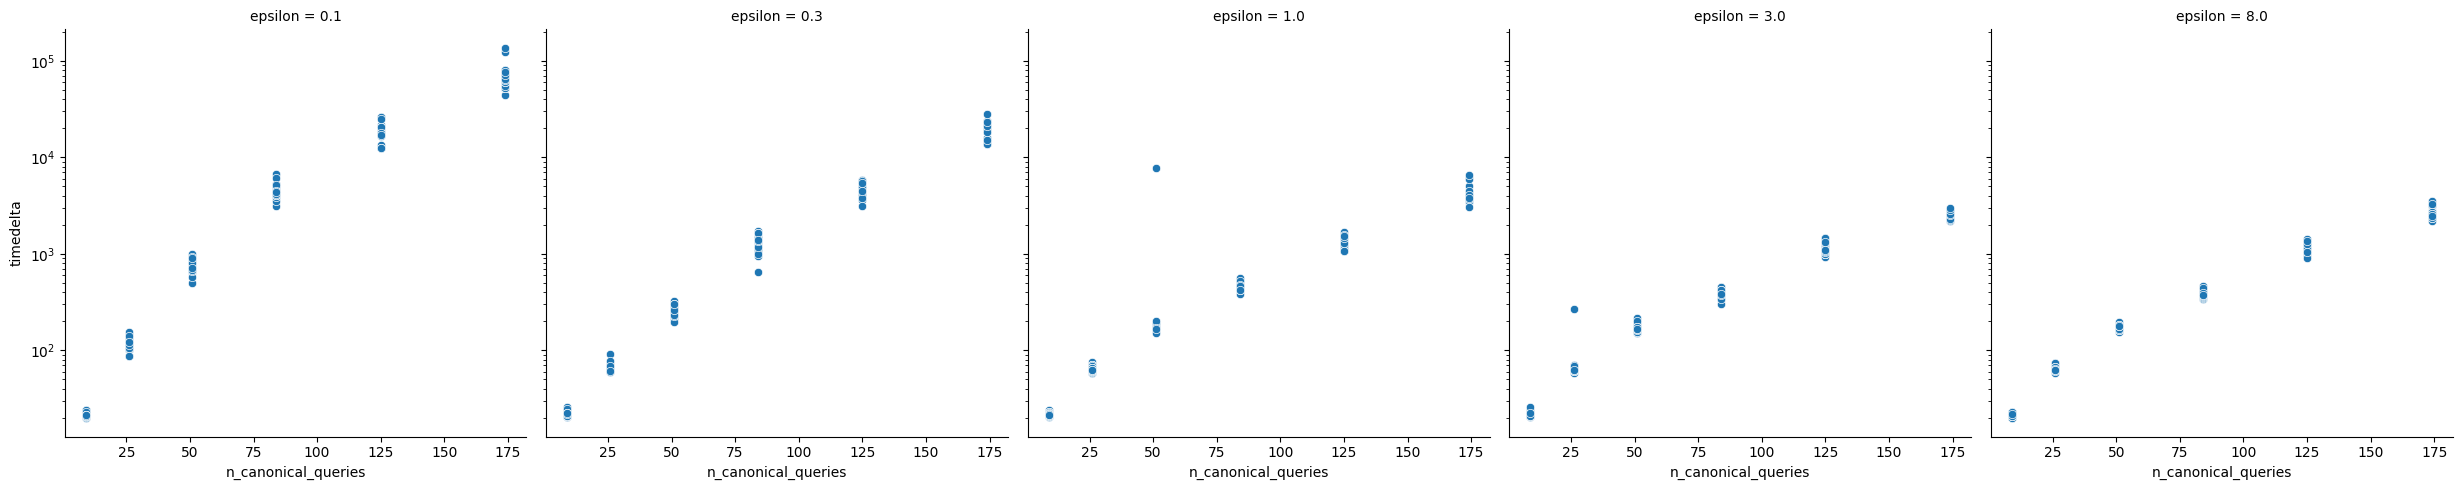

In [9]:
sns.relplot(
    data=MCMC_rows,
    x="n_canonical_queries", y="timedelta", col="epsilon",
)
plt.yscale("log")
plt.plot()

[]

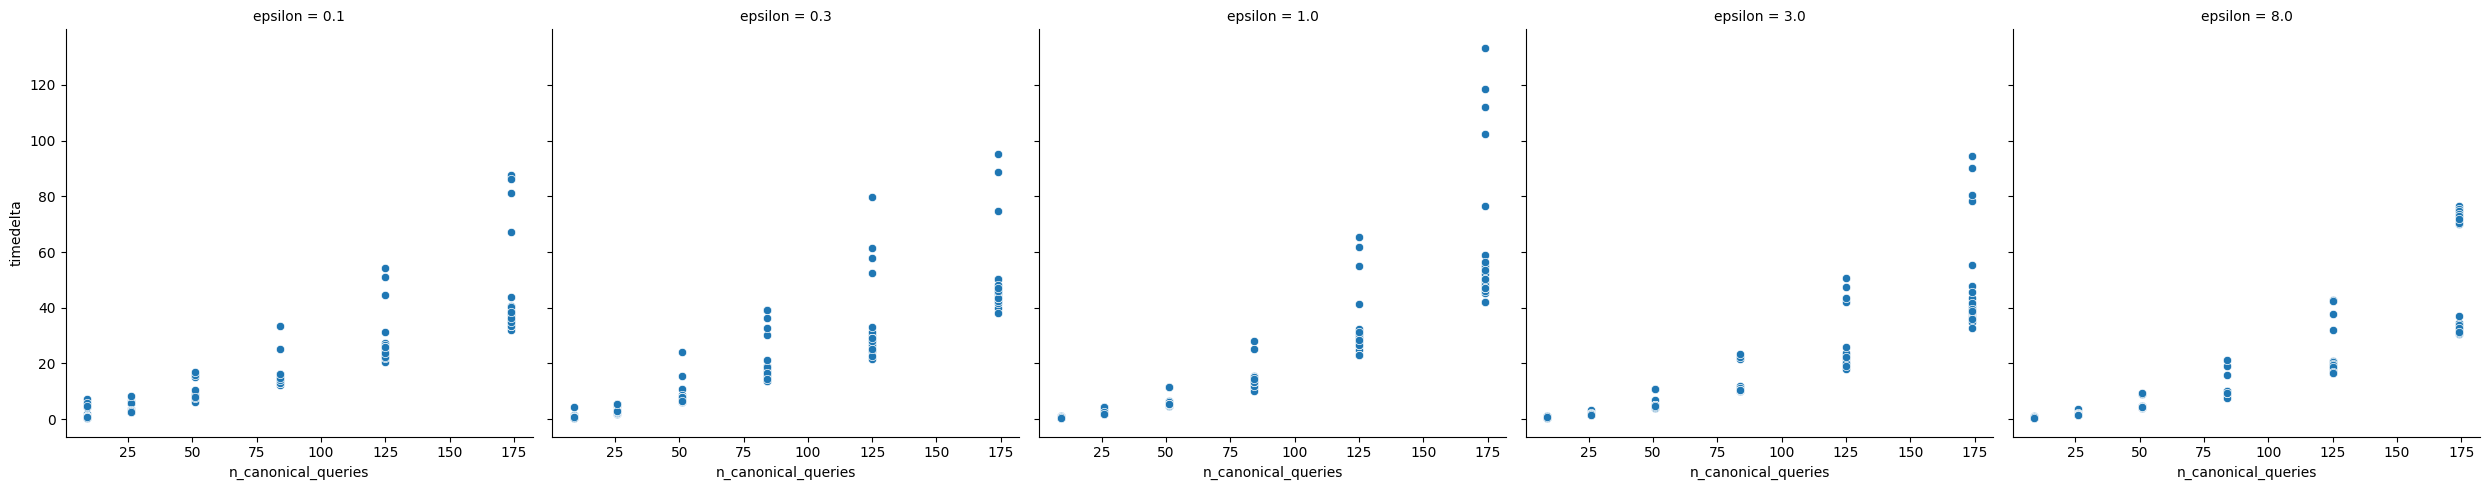

In [10]:
LA_rows = linear_regression_results[linear_regression_results['task'] == 'Laplace approximation']
sns.relplot(
    data=LA_rows,
    x="n_canonical_queries", y="timedelta", col="epsilon",
)

plt.plot()

In [17]:
n = 600
x = MCMC_rows['n_canonical_queries'].to_numpy()
y = MCMC_rows['epsilon'].to_numpy()
z = MCMC_rows['timedelta'].to_numpy()

In [21]:
def least_squares_fit(x, y, z):
    
    n = len(x)
    degree = 3

    A = []

    for i in range(n):
        A.append([])
        for xd in range(degree+1):
            for yd in range(degree+1-xd):
                A[i].append((x[i]**xd)*(y[i]**yd))            

    c,_,_,_ = linalg.lstsq(A,Z)

    j = 0

    for xd in range(0,degree+1):
        for yd in range(0,degree+1-xd):
            print(f" + ({c[j]}) x^ {xd} y^ {yd}")
            j += 1
            
    return None

In [22]:
least_squares_fit(x, y, z)

 + (2495.106322699687) x^ 0 y^ 0
 + (-13108.82226563913) x^ 0 y^ 1
 + (6861.014423258641) x^ 0 y^ 2
 + (-667.6689583109751) x^ 0 y^ 3
 + (53.878713430672704) x^ 1 y^ 0
 + (-83.2077018700685) x^ 1 y^ 1
 + (13.539148043374267) x^ 1 y^ 2
 + (-0.29809204626717345) x^ 2 y^ 0
 + (-0.2948526288535999) x^ 2 y^ 1
 + (0.0081936560230044) x^ 3 y^ 0


In [25]:
def runtime_estimation_function(n_canonical_queries, epsilon):
    result = 3272.8513081068527 + 
    -15513.186768508473*epsilon + 
    8154.979581595167*(epsilon**2) + 
    -793.8353478725403*(epsilon**3) + 
    31.977790561866836*n_canonical_queries + 
    -101.97188005090729*n_canonical_queries*epsilon + 
    16.230331543572248*n_canonical_queries*(epsilon**2) + 
    0.1682323506139619*(n_canonical_queries**2) + 
    -0.33833026643051833*(n_canonical_queries**2)*epsilon + 
    0.00762688551925114*(n_canonical_queries**3)
    return 3272.8513081068527 + -15513.186768508473*epsilon + 8154.979581595167*(epsilon**2) + -793.8353478725403*(epsilon**3) + 31.977790561866836*n_canonical_queries + -101.97188005090729*n_canonical_queries*epsilon + 16.230331543572248*n_canonical_queries*(epsilon**2) + 0.1682323506139619*(n_canonical_queries**2) + -0.33833026643051833*(n_canonical_queries**2)*epsilon + 0.00762688551925114*(n_canonical_queries**3)

SyntaxError: invalid syntax (3051487764.py, line 2)

In [23]:
MCMC_rows['runtime_estimation'] = MCMC_rows.apply(lambda x: runtime_estimation_function(x['n_canonical_queries'], x['epsilon']), axis=1)

NameError: name 'runtime_estimation_function' is not defined

In [24]:
MCMC_rows

,experiment_id,start,stop,timedelta,task,dataset_name,query,epsilon,delta,MCMC_algo,...,query_str,query_list,missing_query,discretization,no_privacy,n_canonical_queries,junction_tree_width,suff_stat_dim,suff_stat,dp_suff_stat
5,6VXEVE4E,2.283930e+06,2.283951e+06,21.039890,MCMC,dummy_5x2,NaN,3.0,1.000000e-08,NUTS,...,empty,[],nan,True,False,9.0,2.0,"(9,)",[2385 2556 2606 2510 2409 2503 2588 2476 2468],[2390.84690271 2553.47395266 2614.65103684 251...
12,LXZDGP1V,2.284029e+06,2.285423e+06,1394.257031,MCMC,dummy_5x6,NaN,1.0,1.000000e-08,NUTS,...,empty,[],nan,True,False,125.0,2.0,"(125,)",[419 401 413 421 187 375 406 387 411 219 354 4...,[406.23362781 400.80074374 429.74221141 391.86...
19,9E0CU6OX,2.284388e+06,2.285461e+06,1072.532947,MCMC,dummy_5x6,NaN,3.0,1.000000e-08,NUTS,...,empty,[],nan,True,False,125.0,2.0,"(125,)",[419 401 413 421 187 375 406 387 411 219 354 4...,[414.44782999 400.92895019 418.96985514 410.60...
26,QLWS3JDU,2.284712e+06,2.285666e+06,954.699675,MCMC,dummy_5x6,NaN,8.0,1.000000e-08,NUTS,...,empty,[],nan,True,False,125.0,1.0,"(125,)",[419 401 413 421 187 375 406 387 411 219 354 4...,[417.12672534 400.97076212 415.45666975 416.72...
33,NG1FR9RZ,2.285241e+06,2.286957e+06,1716.179964,MCMC,dummy_5x5,NaN,0.3,1.000000e-08,NUTS,...,empty,[],nan,True,False,84.0,1.0,"(84,)",[642 590 592 335 619 598 640 325 649 632 655 3...,[720.59274661 604.04779233 647.31134368 303.33...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4170,4BKGKKDQ,2.330752e+06,2.411995e+06,81242.716365,MCMC,dummy_5x7,NaN,0.1,1.000000e-08,NUTS,...,empty,[],nan,True,False,174.0,3.0,"(174,)",[274 284 275 299 287 134 287 288 262 295 282 1...,[ 349.81721256 40.85703569 298.6153545 32...
4177,9DJNQP0T,2.330649e+06,2.411988e+06,81339.734512,MCMC,dummy_5x7,NaN,0.1,1.000000e-08,NUTS,...,empty,[],nan,True,False,174.0,3.0,"(174,)",[261 270 276 281 275 139 277 270 282 268 266 1...,[ 4.26601451e+02 4.41915277e+02 1.97753149e+...
4184,DI93IFQQ,2.338242e+06,2.414202e+06,75960.135294,MCMC,dummy_5x7,NaN,0.1,1.000000e-08,NUTS,...,empty,[],nan,True,False,174.0,3.0,"(174,)",[281 275 290 284 302 146 260 284 267 259 261 1...,[ 172.56365911 205.09950811 243.4145154 17...
4191,23Q3HN44,2.332817e+06,2.456655e+06,123837.853013,MCMC,dummy_5x7,NaN,0.1,1.000000e-08,NUTS,...,empty,[],nan,True,False,174.0,3.0,"(174,)",[271 262 308 282 325 131 266 260 289 275 273 1...,[ 2.07481325e+02 5.04777402e+01 4.84484071e+...


/tmp/ipykernel_25641/4143813567.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.relplot(


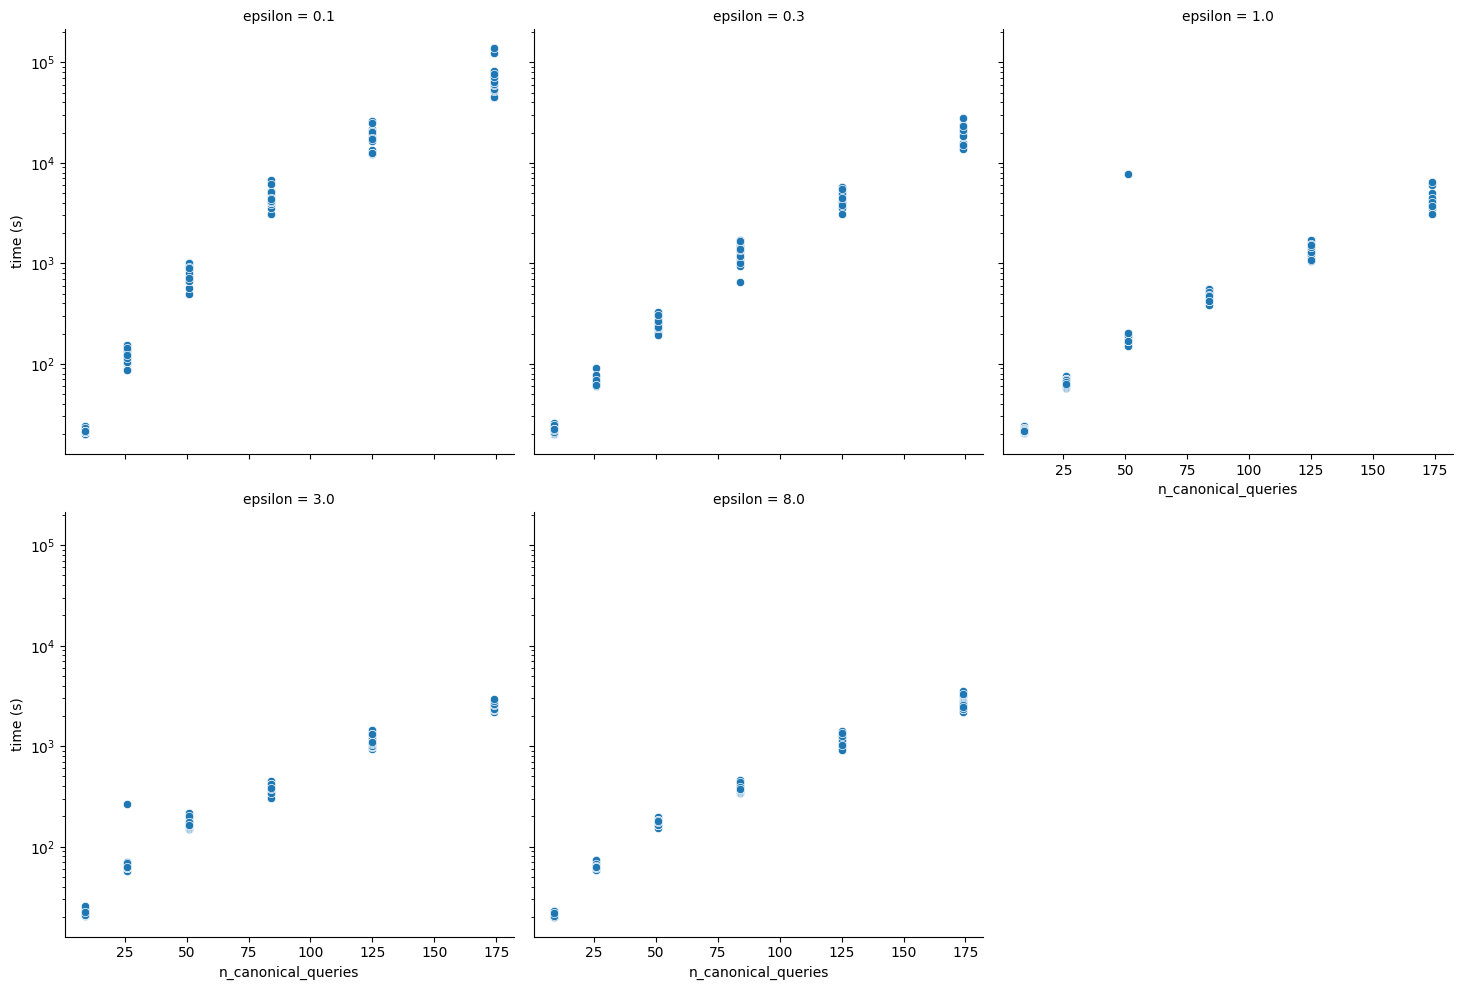

In [26]:
g = sns.relplot(
    data=MCMC_rows,
    x="n_canonical_queries", y="timedelta", col="epsilon", palette="flare", col_wrap=3
)

g.set_ylabels("time (s)")
plt.yscale("log")

plt.show()

#g.savefig(os.path.join(PLOTS_FOLDER, "runtime_estimation_for_dummy_data_separated.pdf"))

[]

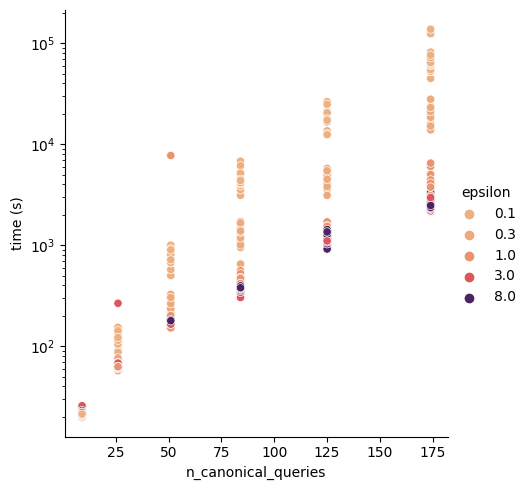

In [27]:
g = sns.relplot(
    data=MCMC_rows,
    x="n_canonical_queries", y="timedelta", hue="epsilon", palette="flare"
)

plt.ylabel("time (s)")
plt.yscale("log")

plt.plot()
#g.savefig(os.path.join(PLOTS_FOLDER, "runtime_estimation_for_dummy_data.pdf"))

In [ ]:
le